In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read data

In [5]:
data_folder = 'C:/Users/Graham West/Python Notebooks/Meharry Teaching/Datasets/'

df = pd.read_csv( data_folder + r'Hourly Energy Consumption\DAYTON_hourly.csv', index_col=0 , header=0)

display(df.info())
display(df.head(2))

<class 'pandas.core.frame.DataFrame'>
Index: 121275 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DAYTON_MW  121275 non-null  float64
dtypes: float64(1)
memory usage: 1.9+ MB


None

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0


In [6]:
# convert index to datetime
df.index = pd.to_datetime(df.index)

# temporal sort (a few rows are out of order)
df = df.sort_index()

# because i'm lazy and don't want to type so much
df = df.rename(columns={'DAYTON_MW':'mw'})

# Exploring the data

## Find missing values

In [7]:
df.isna().sum()

mw    0
dtype: int64

## Find and fill gaps

In [14]:
pd.Series(df.index).diff().value_counts().sort_index()

Datetime
0 days 01:00:00    121245
0 days 02:00:00        25
Name: count, dtype: int64

In [13]:
# remove duplicate days
df = df[~df.index.duplicated(keep='first')]

In [15]:
# insert a few missing hours
dates = pd.Series(pd.date_range(start=df.index.min(), end=df.index.max(), freq='H'), name='date')

df = pd.merge(df, dates, left_index=True, right_on='date', how='right')
df = df.set_index('date').sort_index()
df = df.ffill()

pd.Series(df.index).diff().value_counts().sort_index()

C:\Users\Graham West\AppData\Local\Temp\ipykernel_2340\1681860096.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.Series(pd.date_range(start=df.index.min(), end=df.index.max(), freq='H'), name='date')


date
0 days 01:00:00    121295
Name: count, dtype: int64

## Basic plot

<Axes: xlabel='date'>

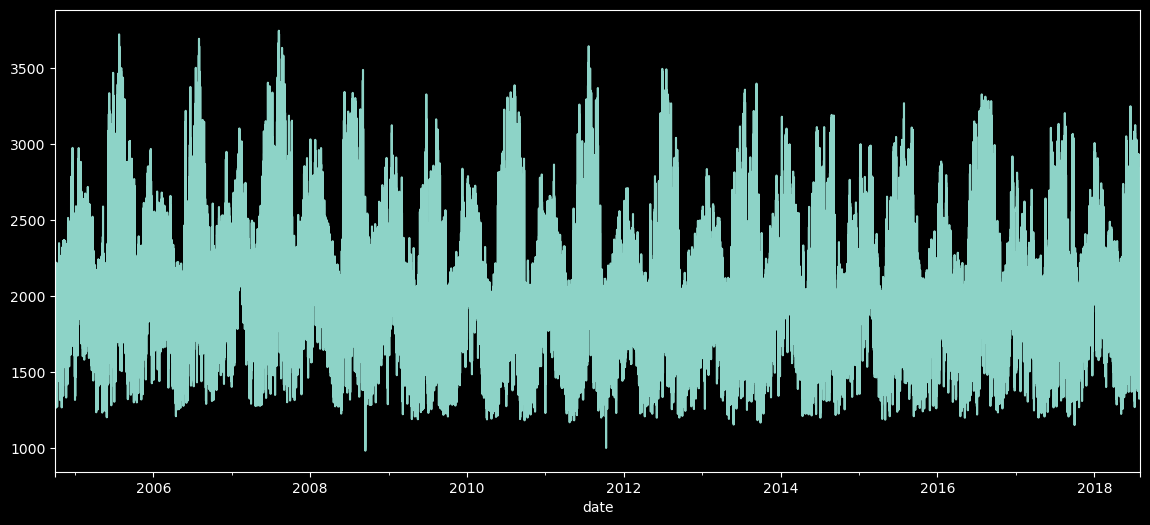

In [17]:
plt.figure(figsize=(14,6))
df.mw.plot()

## Advanced plot
- change xticks
- draw certical red lines to mark years

C:\Users\Graham West\AppData\Local\Temp\ipykernel_2340\59674100.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='Y'));
C:\Users\Graham West\AppData\Local\Temp\ipykernel_2340\59674100.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  for date in pd.date_range(start=df.index.min(), end=df.index.max(), freq='Y'):


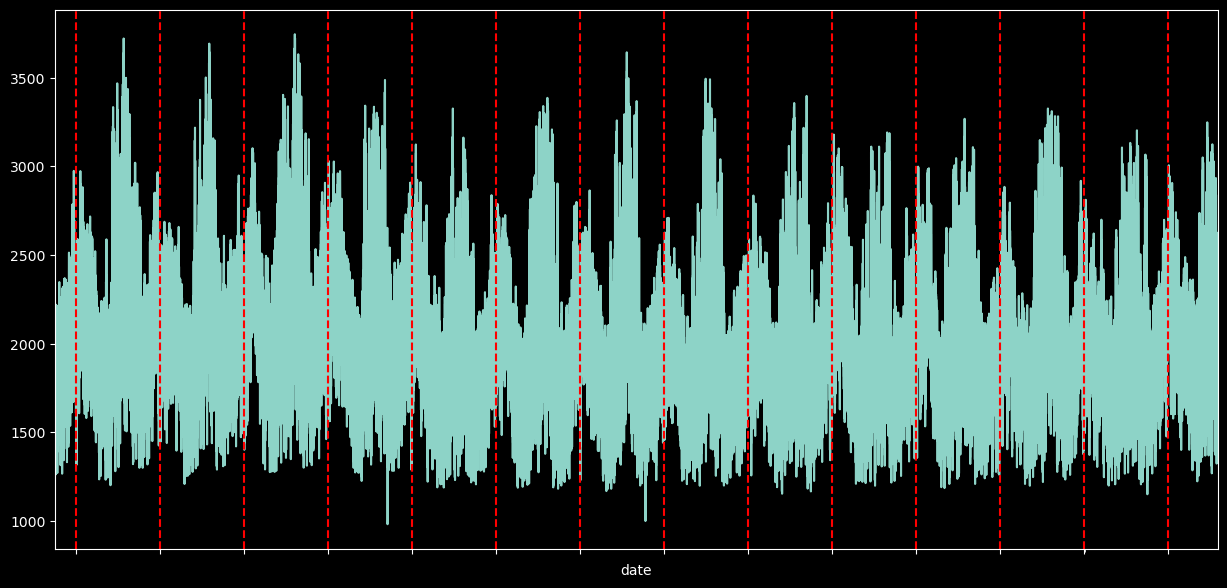

In [18]:
plt.figure(figsize=(15,7))
df.mw.plot()
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='Y'));

for date in pd.date_range(start=df.index.min(), end=df.index.max(), freq='Y'):
    plt.axvline(x=date, color='red', linestyle='--')
# end

## Plot one week of data

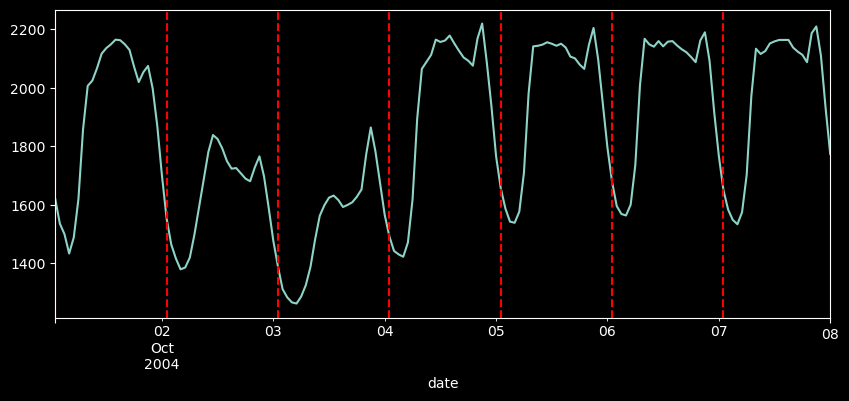

In [26]:
df_week = df.iloc[:24*7].copy()
df_week.mw.plot(figsize=(10,4))

for date in pd.date_range(start=df_week.index.min(), end=df_week.index.max(), freq='D'):
    plt.axvline(x=date, color='red', linestyle='--')
# end

## Plot one month of data

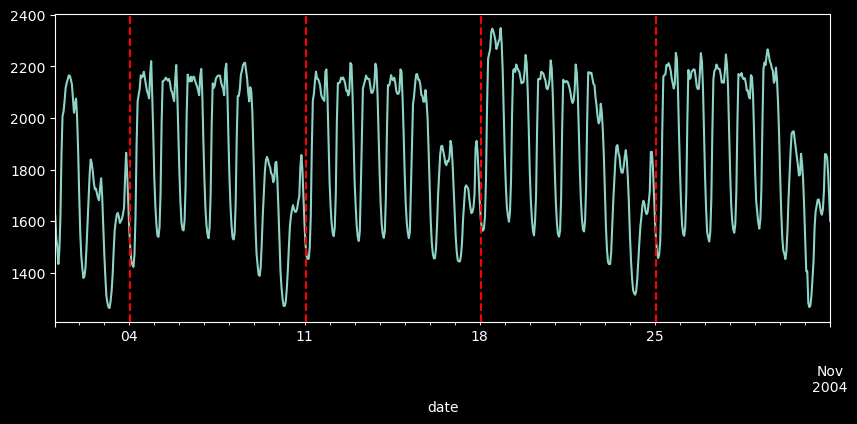

In [30]:
df_month = df.iloc[:24*31]
df_month.mw.plot(figsize=(10,4))

for date in pd.date_range(start=df_month.index.min(), end=df_month.index.max(), freq='W-Mon'):
    plt.axvline(x=date, color='red', linestyle='--')
# end

## Plot three years of data

C:\Users\Graham West\AppData\Local\Temp\ipykernel_2340\3951621553.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for date in pd.date_range(start=df_year.index.min(), end=df_year.index.max(), freq='M'):


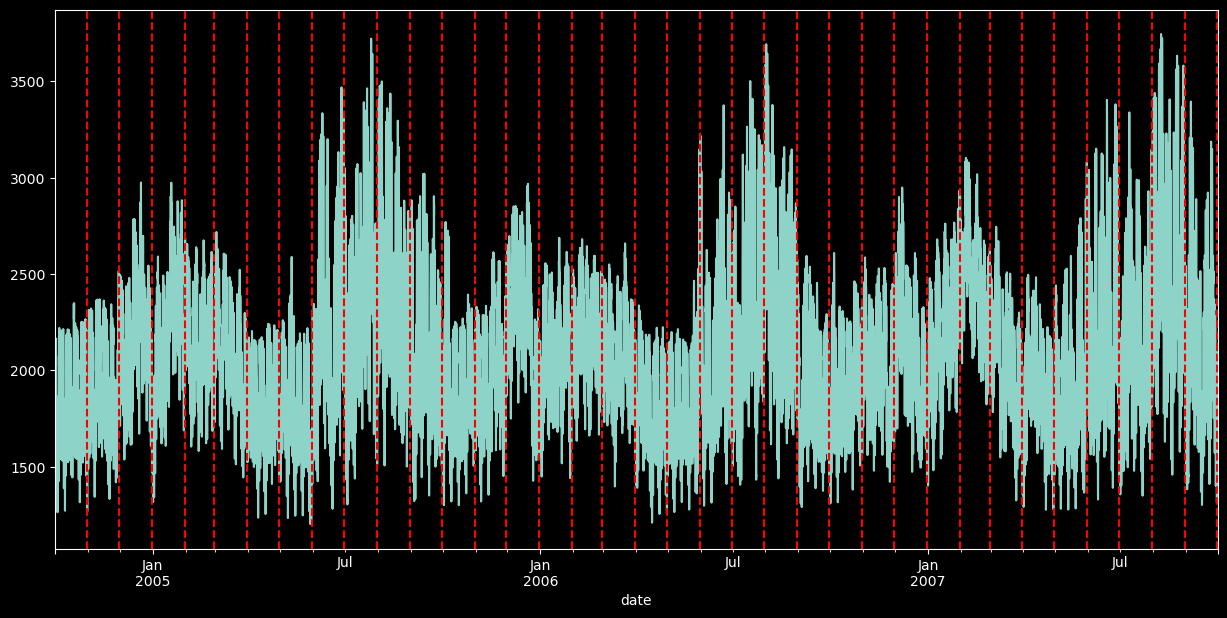

In [27]:
plt.figure(figsize=(15,7))
df_year = df.iloc[:24*365*3]
df_year.mw.plot()

for date in pd.date_range(start=df_year.index.min(), end=df_year.index.max(), freq='M'):
    plt.axvline(x=date, color='red', linestyle='--')
# end

# Datetime attribute

In [36]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek # monday = 0
df['week'] = df.index.isocalendar().week
df['dayofmonth'] = df.index.day
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year

df

,mw,hour,dayofweek,week,dayofmonth,month,quarter,dayofyear,year
date,,,,,,,,,
2004-10-01 01:00:00,1621.0,1,4,40,1,10,4,275,2004
2004-10-01 02:00:00,1536.0,2,4,40,1,10,4,275,2004
2004-10-01 03:00:00,1500.0,3,4,40,1,10,4,275,2004
2004-10-01 04:00:00,1434.0,4,4,40,1,10,4,275,2004
2004-10-01 05:00:00,1489.0,5,4,40,1,10,4,275,2004
...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,2554.0,20,3,31,2,8,3,214,2018
2018-08-02 21:00:00,2481.0,21,3,31,2,8,3,214,2018
2018-08-02 22:00:00,2405.0,22,3,31,2,8,3,214,2018


## Plotting energy distributions for different timescales

hour


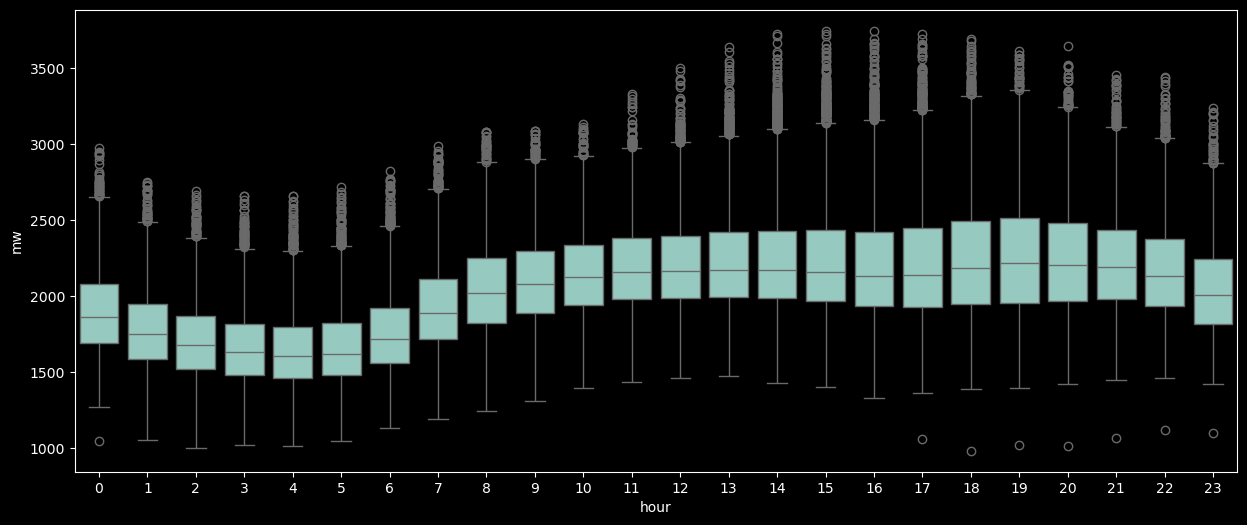

dayofweek


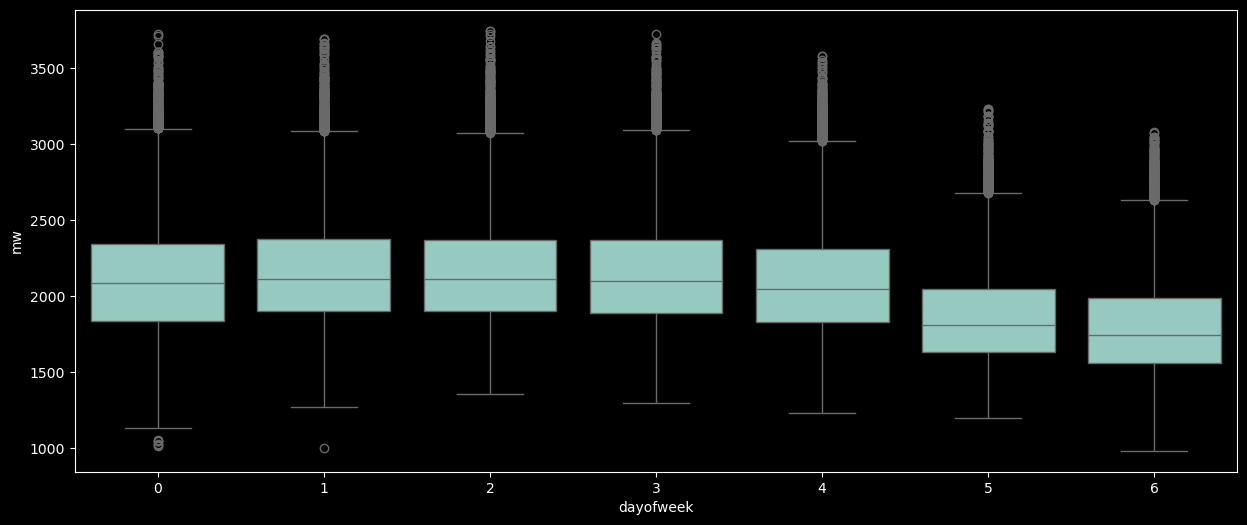

week


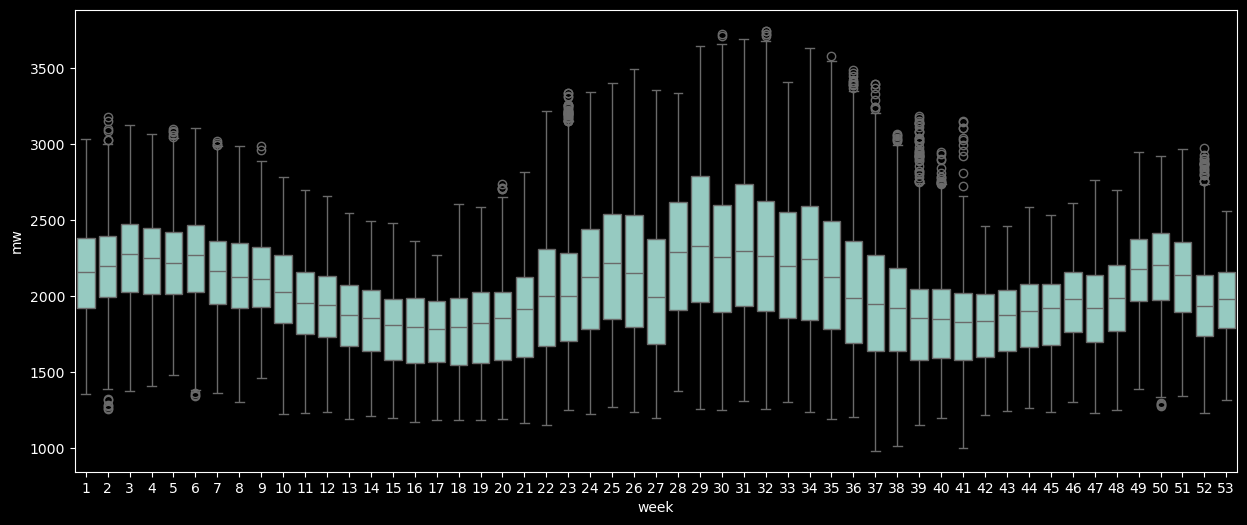

dayofmonth


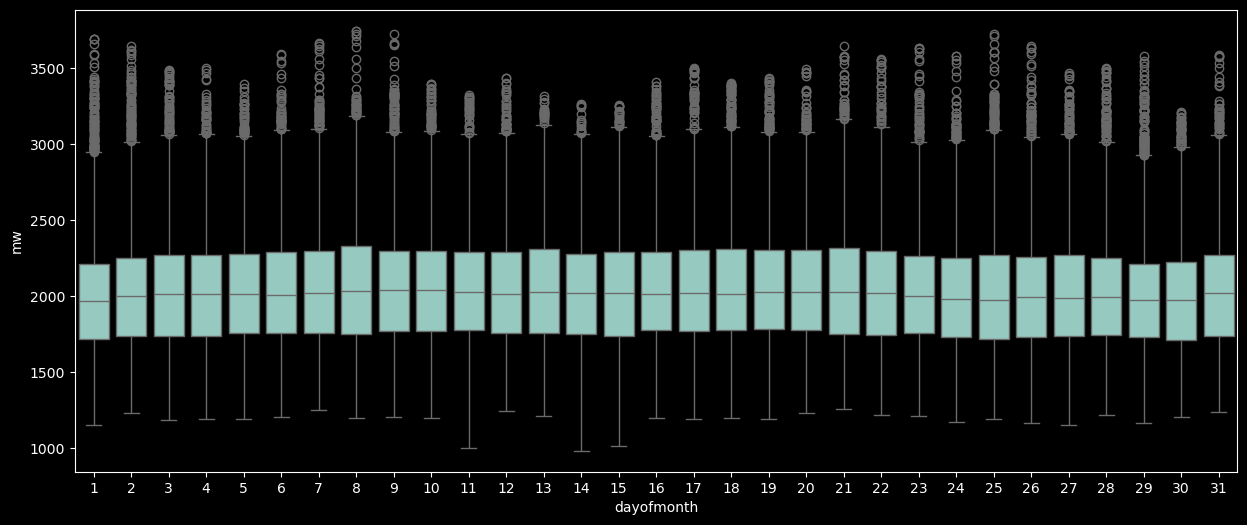

month


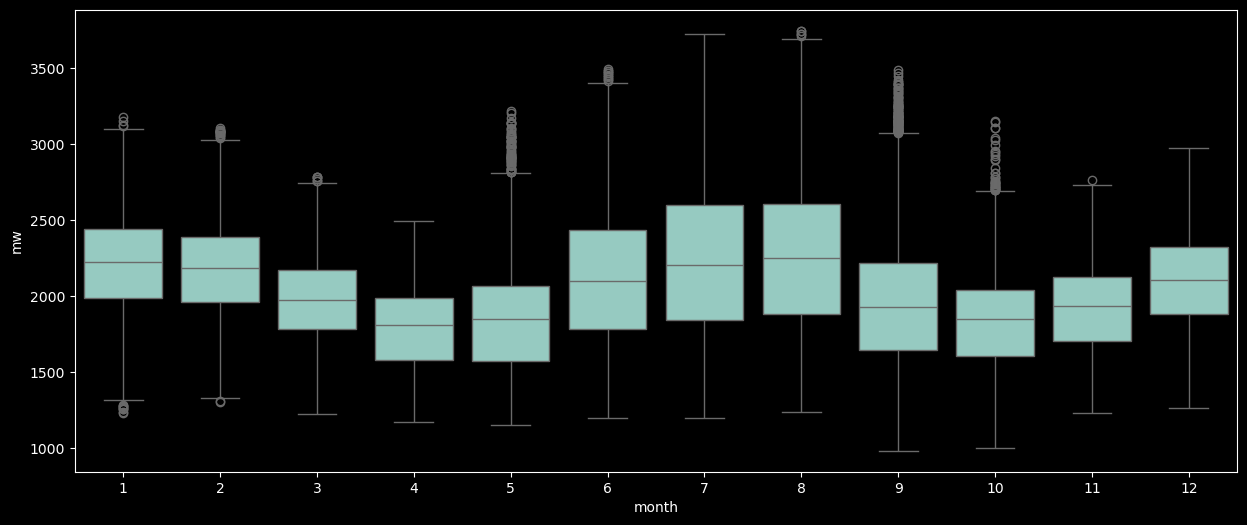

quarter


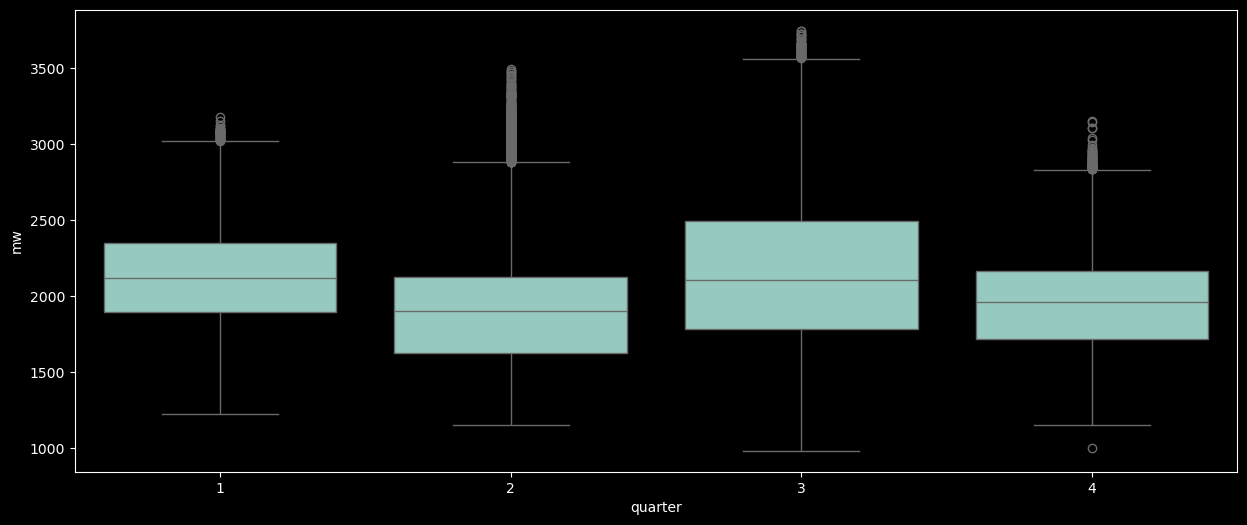

dayofyear


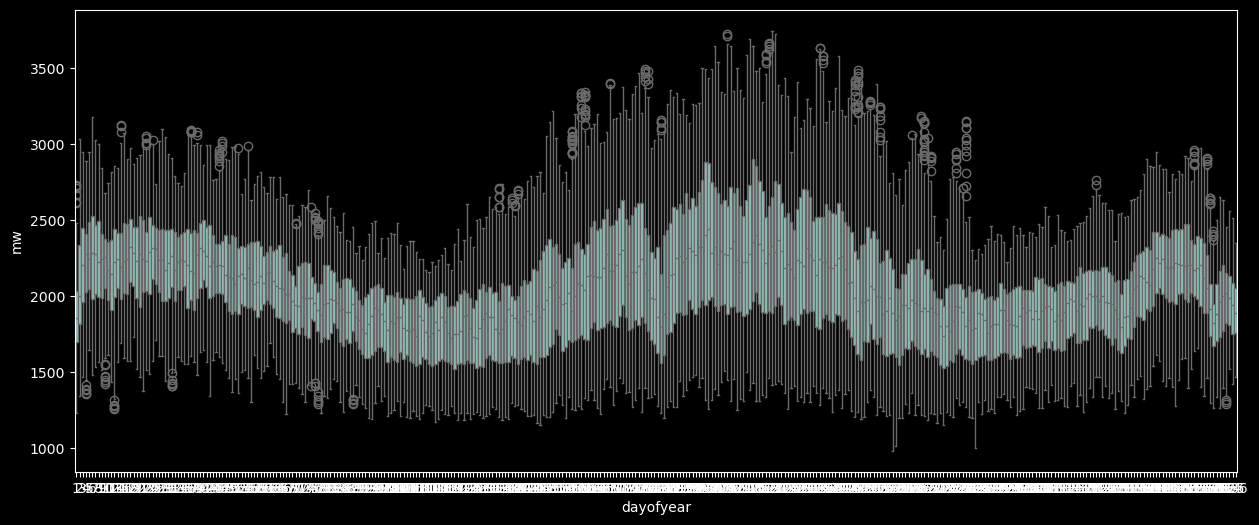

year


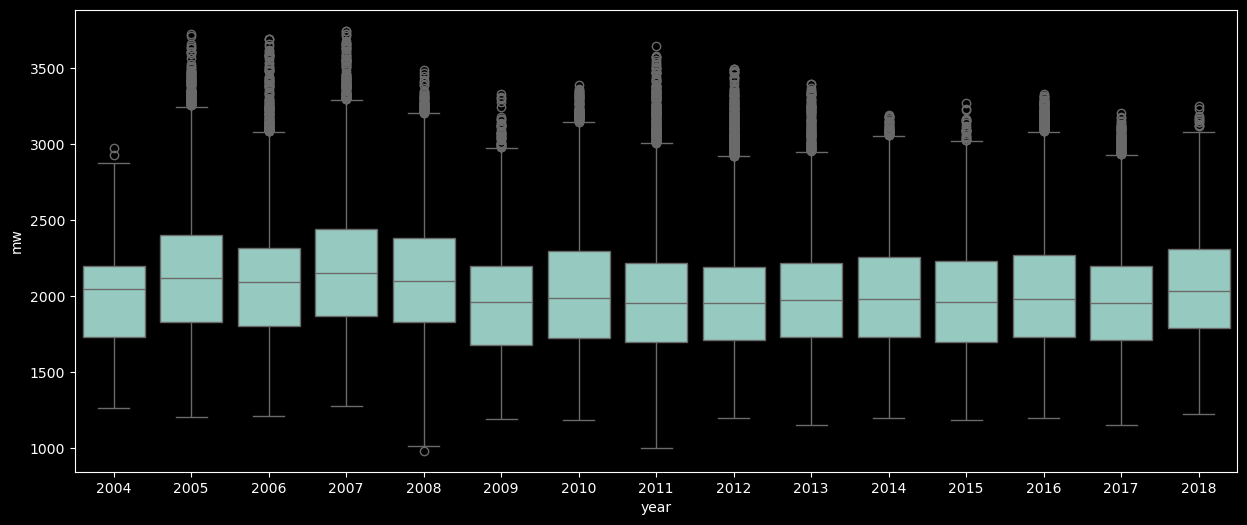

In [37]:
for c in df.columns[1:]:
    print(c)
    plt.figure(figsize=(15,6))
    sns.boxplot( data=df, x=c, y='mw' )
    plt.show()

# Rolling, shift, diff methods

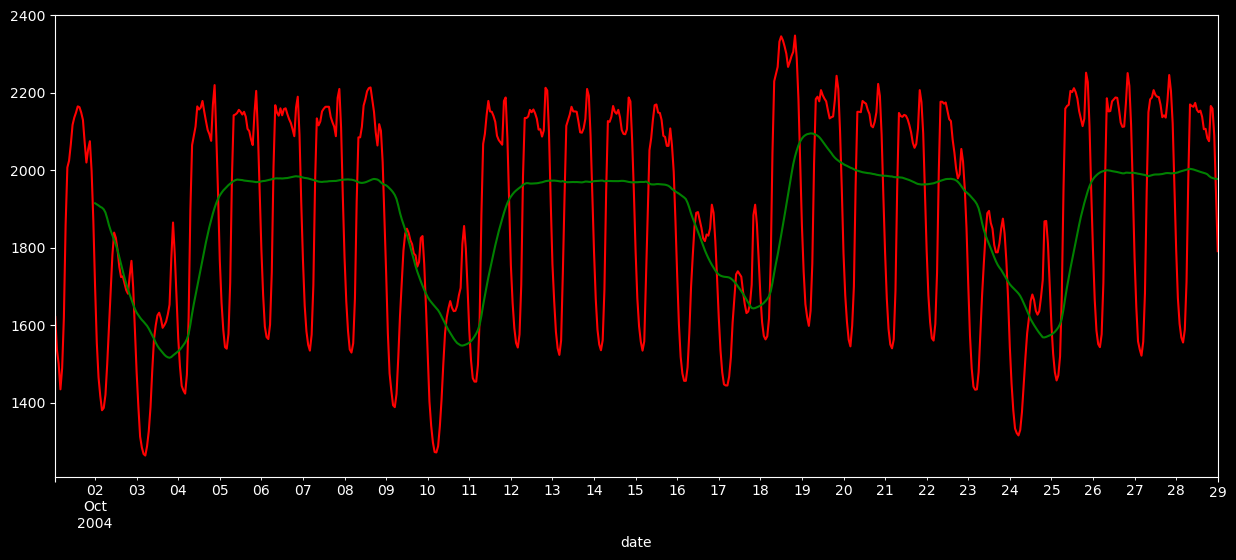

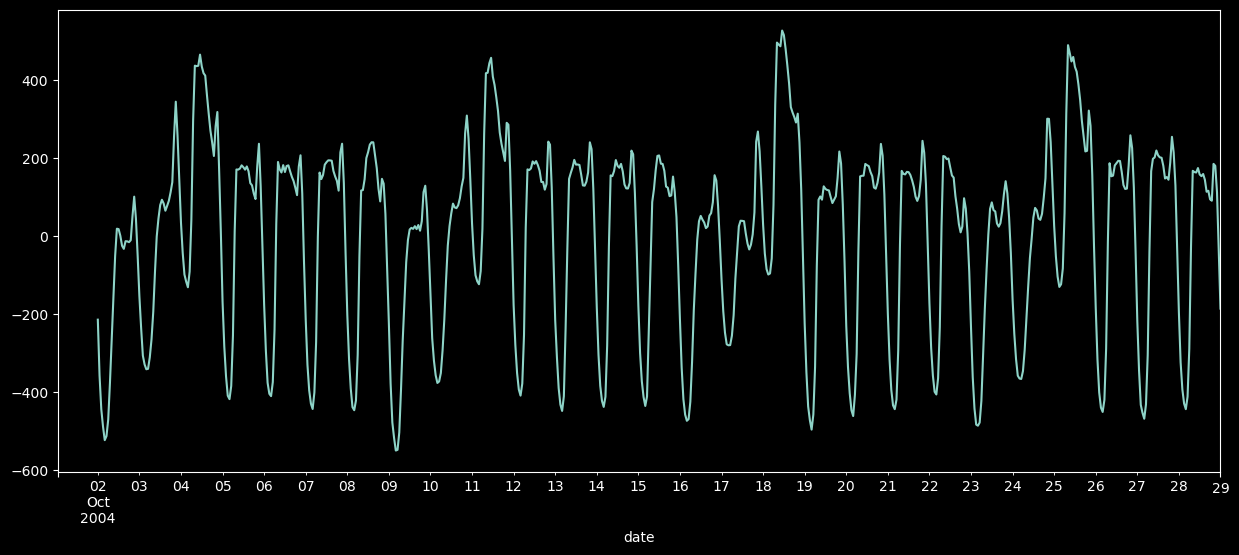

In [43]:
nPts   = 24*7*4
window = 24

df['mw_avg'] = df.mw.rolling(window, center=False).mean()
#df.dropna()

plt.figure(figsize=(15,6))
df.iloc[:nPts].mw.plot(c='r')
df.iloc[:nPts].mw_avg.plot(c='g')
plt.show()

plt.figure(figsize=(15,6))
(df.mw - df.mw_avg)[:nPts].plot()
plt.show()

In [48]:
df['mw_shift'] = df.mw.shift(-1)

df[['mw','mw_shift']]

,mw,mw_shift
date,,
2004-10-01 01:00:00,1621.0,1536.0
2004-10-01 02:00:00,1536.0,1500.0
2004-10-01 03:00:00,1500.0,1434.0
2004-10-01 04:00:00,1434.0,1489.0
2004-10-01 05:00:00,1489.0,1620.0
...,...,...
2018-08-02 20:00:00,2554.0,2481.0
2018-08-02 21:00:00,2481.0,2405.0
2018-08-02 22:00:00,2405.0,2250.0


In [50]:
df['mw_diff'] = df.mw.diff(periods=1)

df[['mw','mw_diff']]

,mw,mw_diff
date,,
2004-10-01 01:00:00,1621.0,NaN
2004-10-01 02:00:00,1536.0,-85.0
2004-10-01 03:00:00,1500.0,-36.0
2004-10-01 04:00:00,1434.0,-66.0
2004-10-01 05:00:00,1489.0,55.0
...,...,...
2018-08-02 20:00:00,2554.0,-46.0
2018-08-02 21:00:00,2481.0,-73.0
2018-08-02 22:00:00,2405.0,-76.0


In [52]:
df['mw_pct_ch'] = df.mw.pct_change(periods=1)

df[['mw','mw_pct_ch']]

,mw,mw_pct_ch
date,,
2004-10-01 01:00:00,1621.0,NaN
2004-10-01 02:00:00,1536.0,-0.052437
2004-10-01 03:00:00,1500.0,-0.023438
2004-10-01 04:00:00,1434.0,-0.044000
2004-10-01 05:00:00,1489.0,0.038354
...,...,...
2018-08-02 20:00:00,2554.0,-0.017692
2018-08-02 21:00:00,2481.0,-0.028583
2018-08-02 22:00:00,2405.0,-0.030633


# Seasonal trend analysis with LOESS (STL)

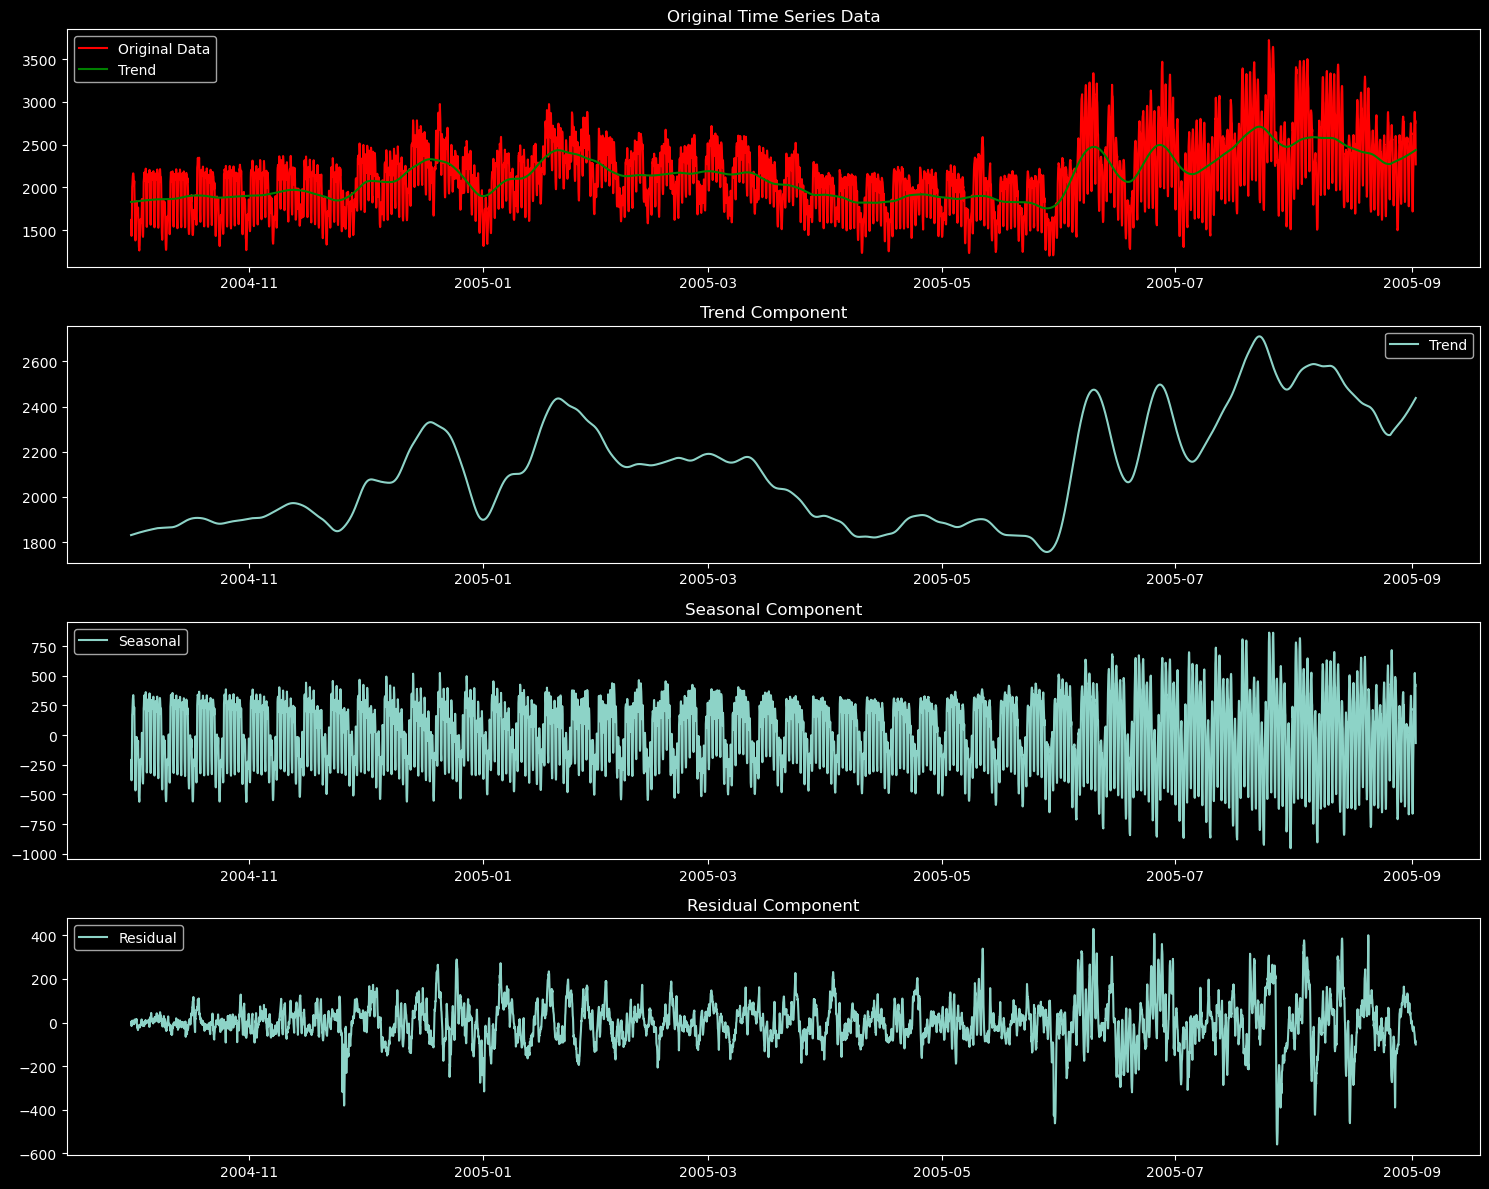

In [58]:
from statsmodels.tsa.seasonal import STL

y = df.mw[:24*7*4*12]

# Perform STL decomposition
stl = STL(y, period=24*7)
result = stl.fit()

y_trend    = result.trend
y_seasonal = result.seasonal
y_resid    = result.resid

# Plot the original time series and its components
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.plot(y, 'r', label='Original Data')
plt.plot(y_trend, 'g', label='Trend')
#plt.plot(y_trend + y_seasonal, 'b--', label='Seasonal')
plt.legend()
plt.title('Original Time Series Data')

plt.subplot(4, 1, 2)
plt.plot(y_trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(y_seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(y_resid, label='Residual')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()